🔧 NOTEBOOK 2: FEATURE ENGINEERING AND EDA
🛠️ ENHANCED FEATURE ENGINEERING...
✅ Enhanced dataset with 49 features

📊 EXPLORATORY DATA ANALYSIS


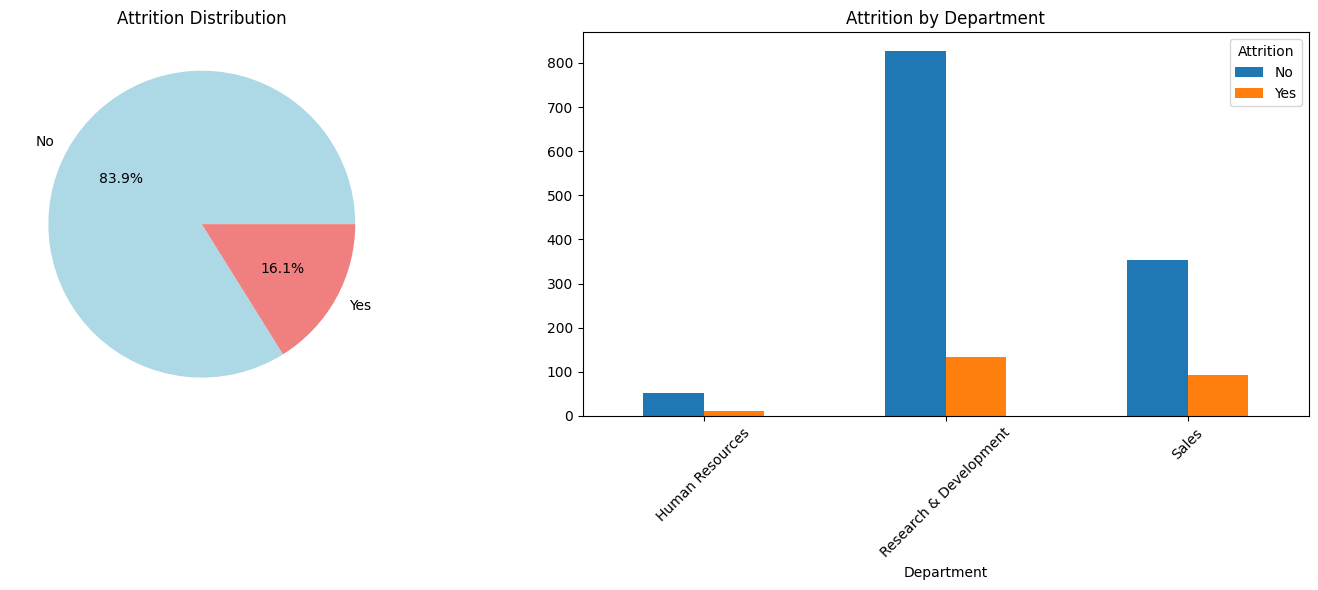

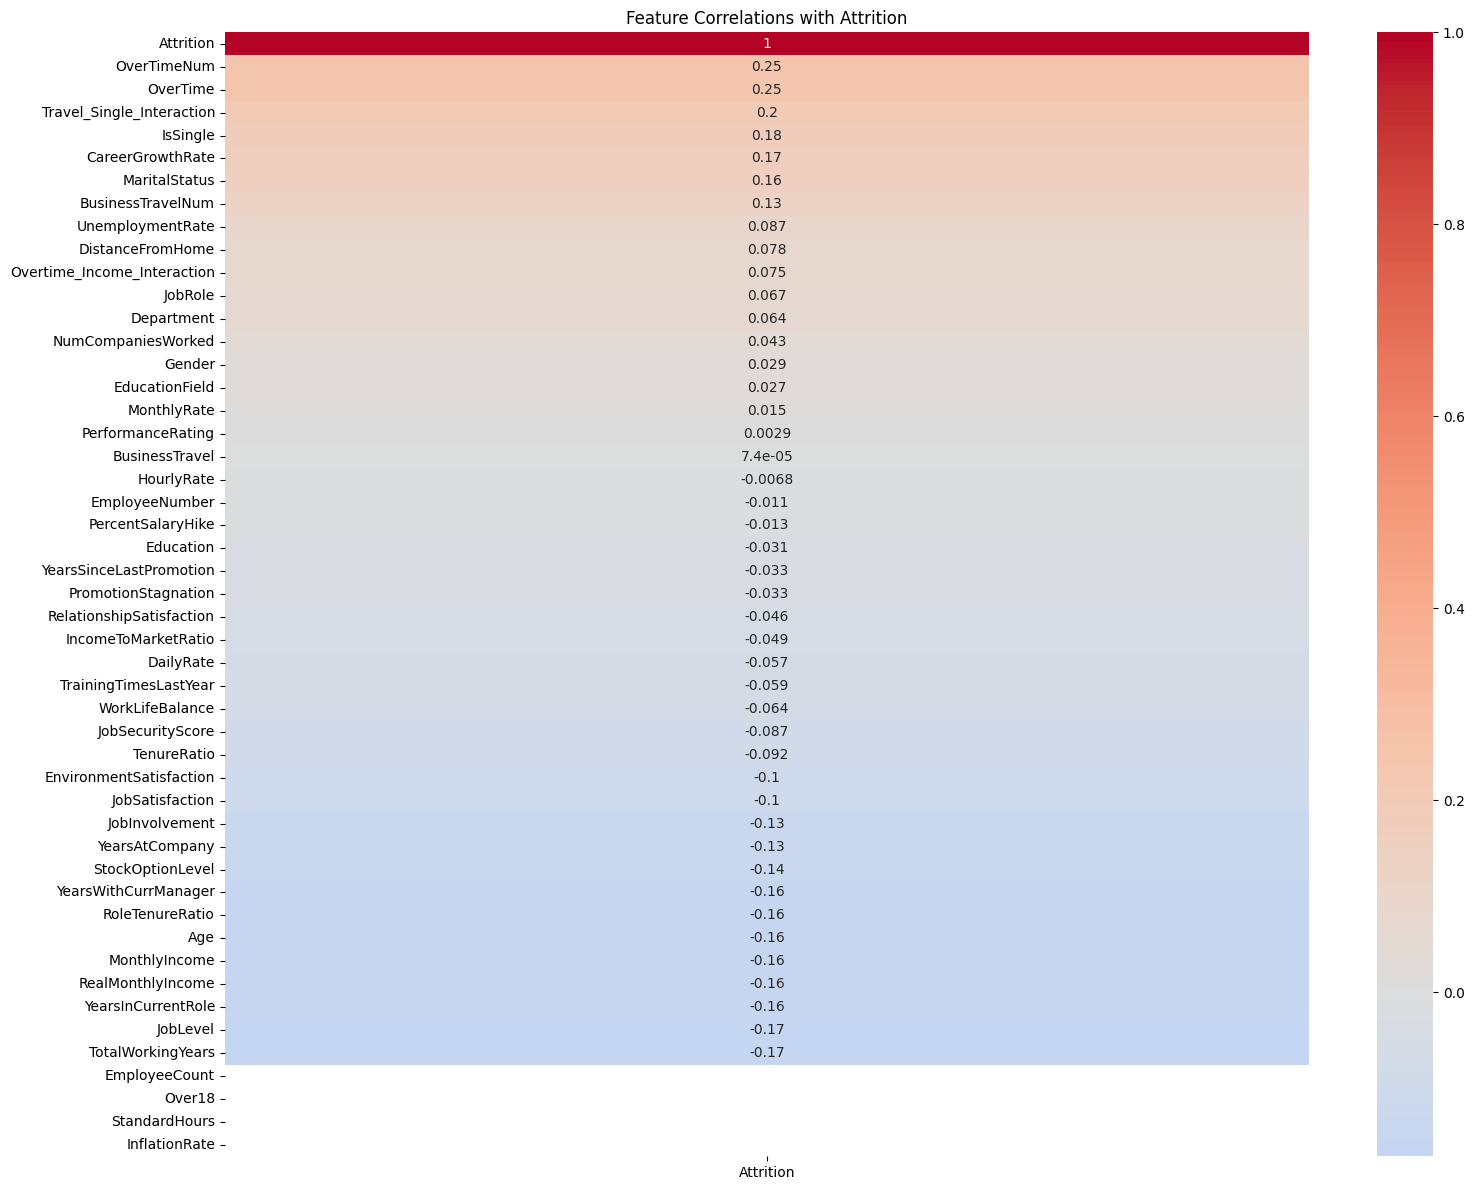

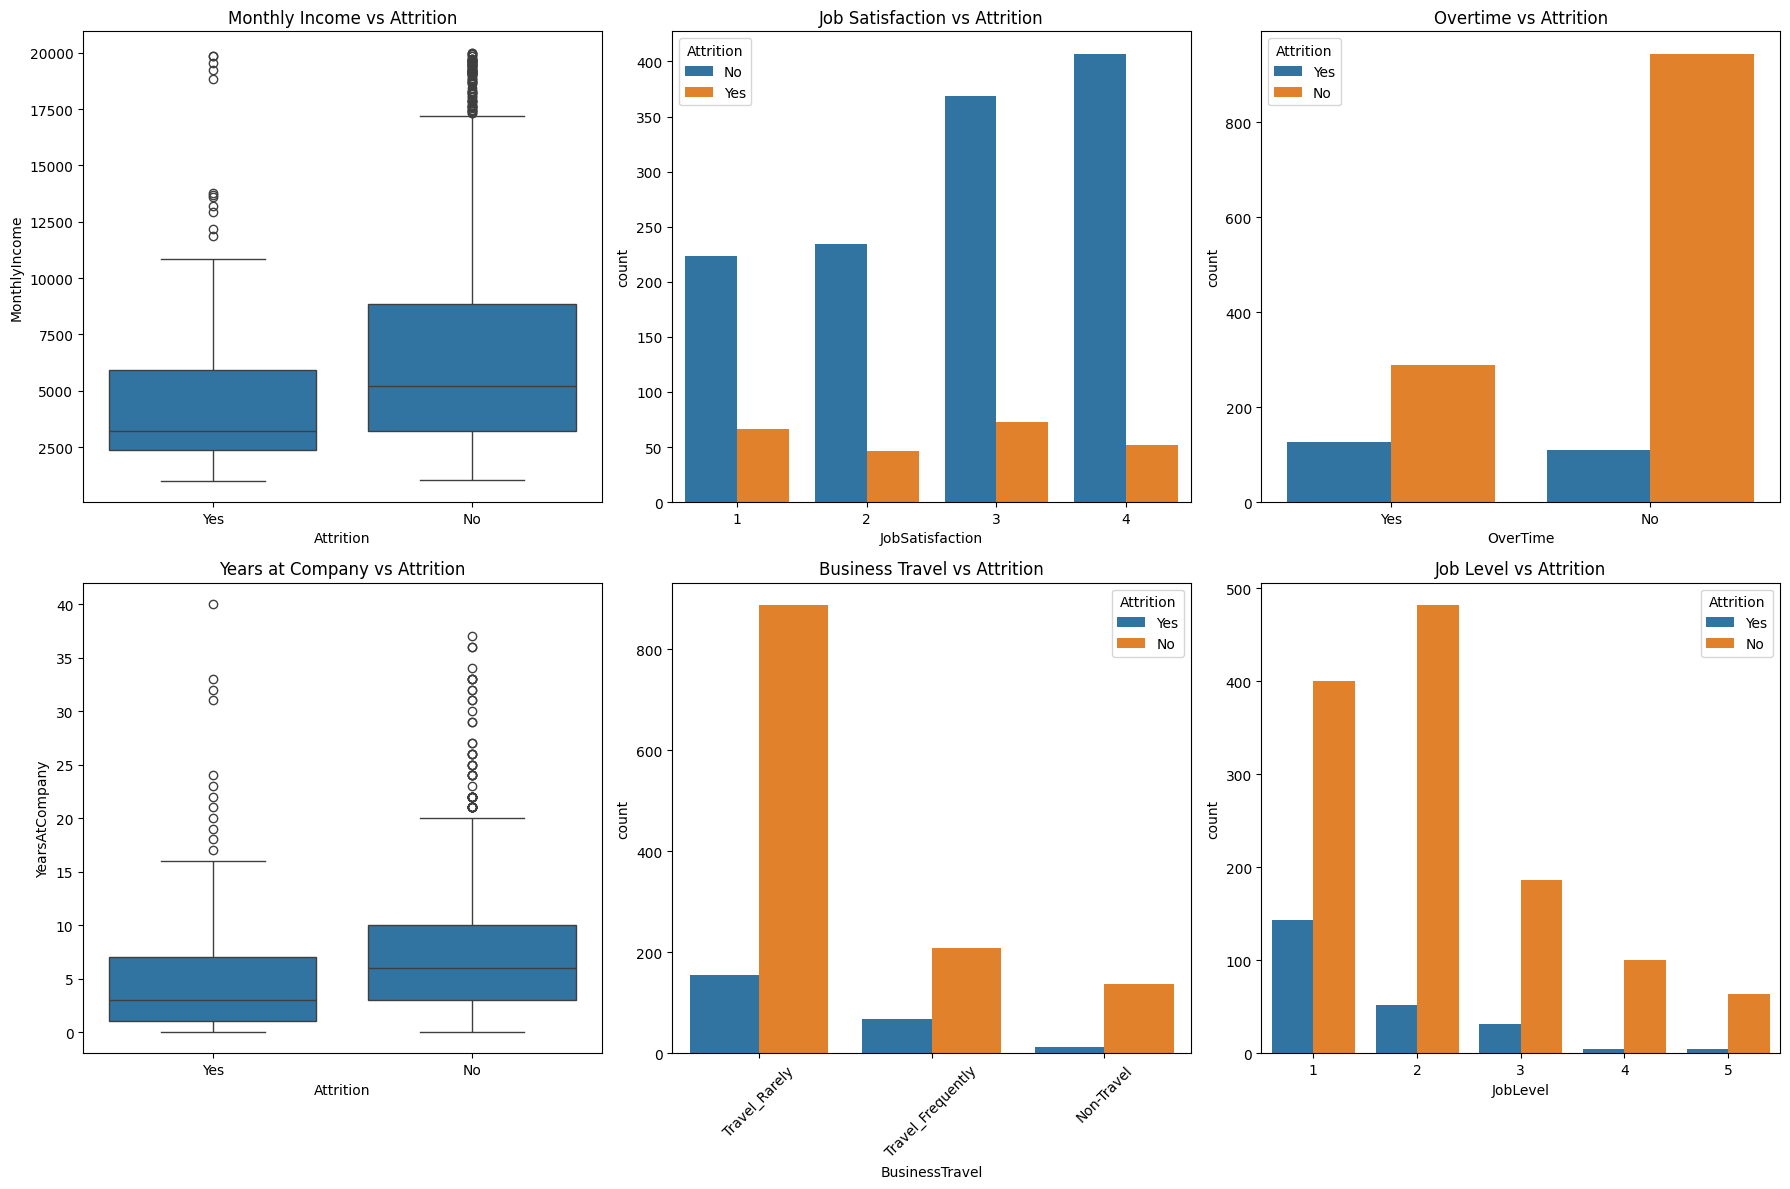


🔍 ANALYSIS OF ENGINEERED FEATURES:


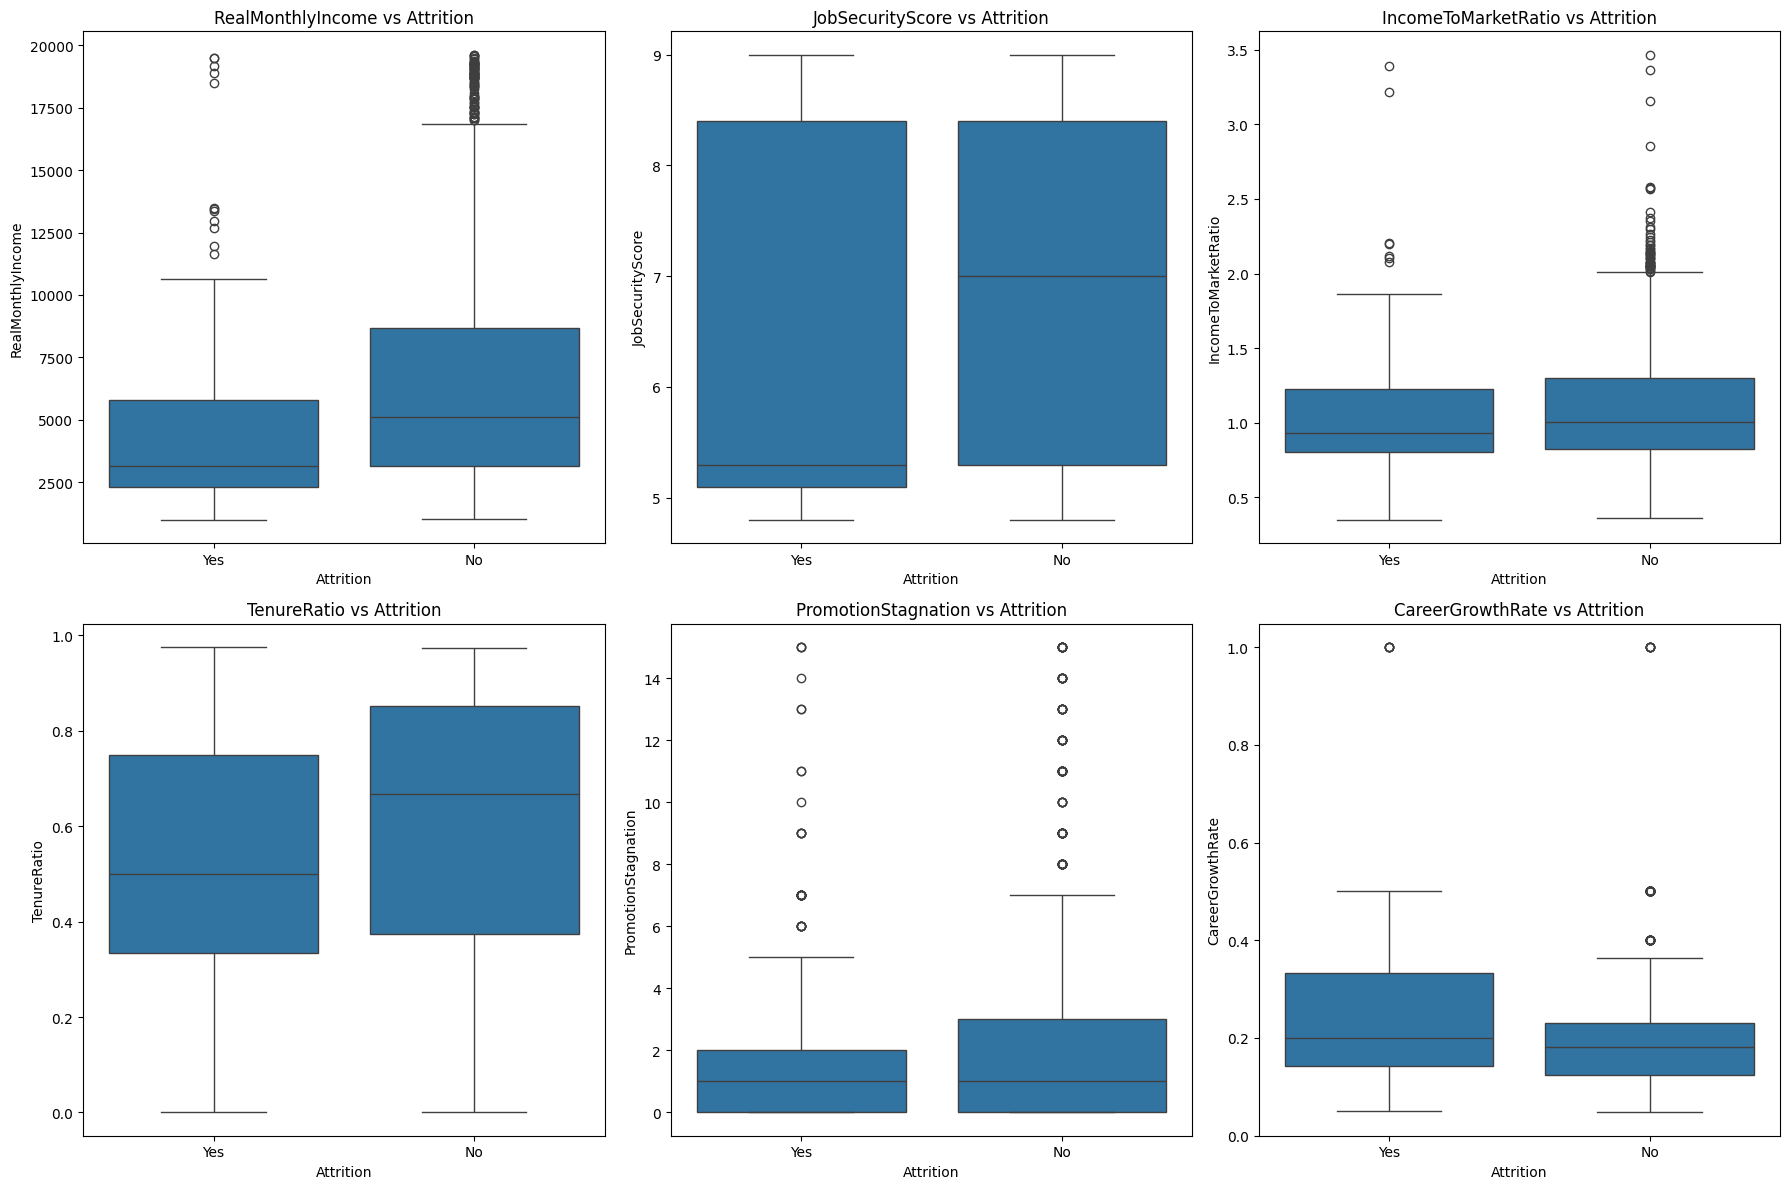

✅ Feature engineering and EDA completed successfully!
✅ Engineered dataset saved to 'employee_attrition_engineered.csv'


In [2]:
# =============================================================================
# NOTEBOOK 2: FEATURE ENGINEERING AND EXPLORATORY DATA ANALYSIS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("🔧 NOTEBOOK 2: FEATURE ENGINEERING AND EDA")
print("=" * 50)

# Load original data
df = pd.read_excel('/content/IBM HR Dataset.xlsx')

# Enhanced feature engineering
print("🛠️ ENHANCED FEATURE ENGINEERING...")

df_engineered = df.copy()

# Economic data integration
unemployment_rates = {
    ('Sales Executive', 'Male'): 4.7, ('Sales Representative', 'Male'): 4.7,
    ('Research Scientist', 'Male'): 1.2, ('Laboratory Technician', 'Male'): 4.9,
    ('Manufacturing Director', 'Male'): 1.6, ('Healthcare Representative', 'Male'): 4.8,
    ('Research Director', 'Male'): 1.6, ('Human Resources', 'Male'): 3.0, ('Manager', 'Male'): 1.6,
    ('Sales Executive', 'Female'): 3.0, ('Sales Representative', 'Female'): 3.0,
    ('Research Scientist', 'Female'): 5.2, ('Laboratory Technician', 'Female'): 1.4,
    ('Manufacturing Director', 'Female'): 2.7, ('Healthcare Representative', 'Female'): 1.0,
    ('Research Director', 'Female'): 2.7, ('Human Resources', 'Female'): 2.8, ('Manager', 'Female'): 2.7
}

df_engineered['UnemploymentRate'] = df_engineered.apply(
    lambda row: unemployment_rates.get((row['JobRole'], row['Gender']), 3.0), axis=1
)
df_engineered['InflationRate'] = 1.9

# Advanced feature engineering
df_engineered['RealMonthlyIncome'] = df_engineered['MonthlyIncome'] / (1 + df_engineered['InflationRate']/100)
df_engineered['JobSecurityScore'] = 10 - df_engineered['UnemploymentRate']
df_engineered['IncomeToMarketRatio'] = df_engineered['MonthlyIncome'] / df_engineered.groupby('JobRole')['MonthlyIncome'].transform('median')

# Work condition features
df_engineered['OverTimeNum'] = df_engineered['OverTime'].map({'Yes': 1, 'No': 0})
travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df_engineered['BusinessTravelNum'] = df_engineered['BusinessTravel'].map(travel_mapping)
df_engineered['IsSingle'] = df_engineered['MaritalStatus'].map({'Single': 1, 'Married': 0, 'Divorced': 0})

# Career progression features
df_engineered['TenureRatio'] = df_engineered['YearsAtCompany'] / (df_engineered['TotalWorkingYears'] + 1)
df_engineered['PromotionStagnation'] = df_engineered['YearsSinceLastPromotion']
df_engineered['RoleTenureRatio'] = df_engineered['YearsInCurrentRole'] / (df_engineered['YearsAtCompany'] + 1)
df_engineered['CareerGrowthRate'] = df_engineered['JobLevel'] / (df_engineered['TotalWorkingYears'] + 1)

# Interaction features
df_engineered['Overtime_Income_Interaction'] = df_engineered['OverTimeNum'] * df_engineered['RealMonthlyIncome']
df_engineered['Travel_Single_Interaction'] = df_engineered['BusinessTravelNum'] * df_engineered['IsSingle']

print(f"✅ Enhanced dataset with {df_engineered.shape[1]} features")

# EXPLORATORY DATA ANALYSIS
print("\n📊 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# 1. Target Variable Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Attrition distribution
attrition_counts = df_engineered['Attrition'].value_counts()
axes[0].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0].set_title('Attrition Distribution')

# Attrition by Department
dept_attrition = pd.crosstab(df_engineered['Department'], df_engineered['Attrition'])
dept_attrition.plot(kind='bar', ax=axes[1])
axes[1].set_title('Attrition by Department')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Correlation Analysis
# Encode for correlation matrix
df_corr = df_engineered.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'Attrition':
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(16, 12))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix[['Attrition']].sort_values('Attrition', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations with Attrition')
plt.tight_layout()
plt.show()

# 3. Key Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Monthly Income by Attrition
sns.boxplot(data=df_engineered, x='Attrition', y='MonthlyIncome', ax=axes[0,0])
axes[0,0].set_title('Monthly Income vs Attrition')

# Job Satisfaction
sns.countplot(data=df_engineered, x='JobSatisfaction', hue='Attrition', ax=axes[0,1])
axes[0,1].set_title('Job Satisfaction vs Attrition')

# Overtime
sns.countplot(data=df_engineered, x='OverTime', hue='Attrition', ax=axes[0,2])
axes[0,2].set_title('Overtime vs Attrition')

# Years at Company
sns.boxplot(data=df_engineered, x='Attrition', y='YearsAtCompany', ax=axes[1,0])
axes[1,0].set_title('Years at Company vs Attrition')

# Business Travel
sns.countplot(data=df_engineered, x='BusinessTravel', hue='Attrition', ax=axes[1,1])
axes[1,1].set_title('Business Travel vs Attrition')
axes[1,1].tick_params(axis='x', rotation=45)

# Job Level
sns.countplot(data=df_engineered, x='JobLevel', hue='Attrition', ax=axes[1,2])
axes[1,2].set_title('Job Level vs Attrition')

plt.tight_layout()
plt.show()

# 4. New Features Analysis
print("\n🔍 ANALYSIS OF ENGINEERED FEATURES:")

# Analyze new features
new_features = ['RealMonthlyIncome', 'JobSecurityScore', 'IncomeToMarketRatio',
                'TenureRatio', 'PromotionStagnation', 'CareerGrowthRate']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(new_features):
    row, col = i // 3, i % 3
    sns.boxplot(data=df_engineered, x='Attrition', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Attrition')

plt.tight_layout()
plt.show()

print("✅ Feature engineering and EDA completed successfully!")

# Save engineered dataset
df_engineered.to_csv('employee_attrition_engineered.csv', index=False)
print("✅ Engineered dataset saved to 'employee_attrition_engineered.csv'")